# Zadania domowe, zestaw 1

W tym zestawie zadań proszę przygotować kod, który będzie generował rozwiązania zadań podanych w tekście.

# Zadanie 1

Zaprojektuj kod, który iteracyjnie obliczy kolejny wyraz rekurencji 

$$F_{n+2}=AF_{n+1}+BF_{n},$$

$$F_0=a_0,\quad F_1=a_1$$

In [14]:
# rownanie
def Rek(a0,a1,A,B):
    xn=a0
    xn1=a1
    n=0
    while True: #wisząca pętla
        xn1,xn=A*xn1+B*xn,xn1
        n+=1
        print(n)
        yield xn1 #leniwa ewaluacja

In [15]:
Fib=Rek(0,1,1,-1)

In [19]:
Primes()[5]

13

In [17]:
[next(Fib) for _ in range(0,10)]

11
12
13
14
15
16
17
18
19
20


[0, 1, 1, 0, -1, -1, 0, 1, 1, 0]

In [24]:
#x=var('x')
#((x-1)**2).expand()
a,b=var('a,b')
R=Rek(a,b,2,-1)
[next(R).expand() for _ in range(0,10)]

[-a + 2*b,
 -2*a + 3*b,
 -3*a + 4*b,
 -4*a + 5*b,
 -5*a + 6*b,
 -6*a + 7*b,
 -7*a + 8*b,
 -8*a + 9*b,
 -9*a + 10*b,
 -10*a + 11*b]

In [34]:
#x=var('x')
#((x-2)**2).expand()
a,b=var('a,b')
R=Rek(a,b,4,-4)
[next(R) for _ in range(0,10)]

[-4*a + 4*b,
 -16*a + 12*b,
 -48*a + 32*b,
 -128*a + 80*b,
 -320*a + 192*b,
 -768*a + 448*b,
 -1792*a + 1024*b,
 -4096*a + 2304*b,
 -9216*a + 5120*b,
 -20480*a + 11264*b]

In [20]:
# generator

def ResztyModN(a,N):
    a0=0
    while True:
        if (a0%N == a):
            yield a0
        a0+=1

In [27]:
gen=ResztyModN(17,57)

In [28]:
[next(gen) for _ in range(0,10)]

[17, 74, 131, 188, 245, 302, 359, 416, 473, 530]

# Zadanie 2

Dany jest wielomian $x^2+m\cdot x+1$, którego pierwiastkami są $\alpha,\beta$. Wyznacz postać wyrażenia

$$\frac{1}{\alpha^3}+\frac{1}{\beta^3}$$

jako funkcji zmiennej $m$.

In [72]:
x=var('x')
m=var('m')
a,b=var('a,b')

In [73]:
expr=(x^2+m*x+1)-(x-a)*(x-b)

In [74]:
expr.collect(x)

-a*b + (a + b + m)*x + 1

In [75]:
expr.coefficients(x,sparse=False)

[-a*b + 1, a + b + m]

In [82]:
c=var('c')
assume(c==1)
bool(c^2==1)

True

In [83]:
forget(c==1)

In [84]:
(1/a^3+1/b^3).factor()

(a^2 - a*b + b^2)*(a + b)/(a^3*b^3)

In [85]:
ee=((1/a^3+1/b^3).factor())

In [90]:
ee.subs({b:-a-m}).factor()

(3*a^2 + 3*a*m + m^2)*m/((a + m)^3*a^3)

In [91]:
(-a*b+1).subs({b:-a-m}).factor()

a^2 + a*m + 1

In [92]:
(ee.subs({b:-a-m}).factor()).subs({a^2:-a*m-1})

(m^2 - 3)*m/((a + m)^3*a^3)

In [105]:
(ee.subs({b:-a-m}).factor()).subs({a^2:-a*m-1})

(m^2 - 3)*m/((a + m)^3*a^3)

In [109]:
#a^3==a*(-a*m-1)
(a*(-a*m-1)).expand()

-a^2*m - a

In [111]:
(-(-a*m-1)*m - a).expand()

a*m^2 - a + m

In [112]:
((a + m)^3).expand()

a^3 + 3*a^2*m + 3*a*m^2 + m^3

In [113]:
(((a + m)^3).expand()).subs({a^3:a*m^2 - a + m})

3*a^2*m + 4*a*m^2 + m^3 - a + m

In [115]:
(((a + m)^3).expand()).subs({a^3:a*m^2 - a + m}).subs({a^2:-a*m-1}).expand()

a*m^2 + m^3 - a - 2*m

In [120]:
((a*m^2 + m^3 - a - 2*m)*(a*m^2 - a + m)).expand()

a^2*m^4 + a*m^5 - 2*a^2*m^2 - 2*a*m^3 + m^4 + a^2 + a*m - 2*m^2

In [121]:
((a*m^2 + m^3 - a - 2*m)*(a*m^2 - a + m)).expand().collect(a)

m^4 + (m^4 - 2*m^2 + 1)*a^2 + (m^5 - 2*m^3 + m)*a - 2*m^2

In [123]:
((a*m^2 + m^3 - a - 2*m)*(a*m^2 - a + m)).expand().collect(a).subs({a^2:-a*m-1}).expand()

-1

In [125]:
#zatem
#(m^2 - 3)*m/((a + m)^3*a^3)
#upraszcza sie do
((m^2 - 3)*m/(-1)).expand()

-m^3 + 3*m

Odpowiedź:

Dany jest wielomian $x^2+m\cdot x+1$, którego pierwiastkami są $\alpha,\beta$. Mamy

$$\frac{1}{\alpha^3}+\frac{1}{\beta^3}=-m^3+3m.$$

In [133]:
#weryfikacja numeryczna
m1=3
sol=solve(x^2+m1*x+1,x)
roo=[s.rhs() for s in sol]

bool((1/roo[0]^3+1/roo[1]^3).simplify_full()==-m1^3+3*m1)

True

In [10]:
#rozwiązanie błyskawiczne z użyciem pierścienia ilorazowego
R.<aa,bb,mm>=PolynomialRing(Rationals(),3)
I=R.ideal([aa*bb-1,aa+bb+mm]) #relacje
S.<abar,bbar,mbar>=R.quotient_ring(I)

1/abar^3+1/bbar^3

-mbar^3 + 3*mbar

# Zadanie 3

W momencie początkowym jesteśmy w punkcie (0,0) na płaszczyźnie i patrzymy na północ. W kroku parzystym obracamy się w lewo i idziemy krok do przodu, w kroku nieparzystym obracamy się w prawo, robimy dwa kroki do przodu i obracamy się w lewo.

Udowodnij, że spacer powtarza się co 9 kroków.

In [151]:
def Spacer():
    pos = 0
    kier = i #==sqrt(-1)
    while True:
        kier *= i^3
        pos += 2*kier
        kier *= i
        yield pos
        
        kier *= i
        pos += kier
        yield pos

In [170]:
s=Spacer()

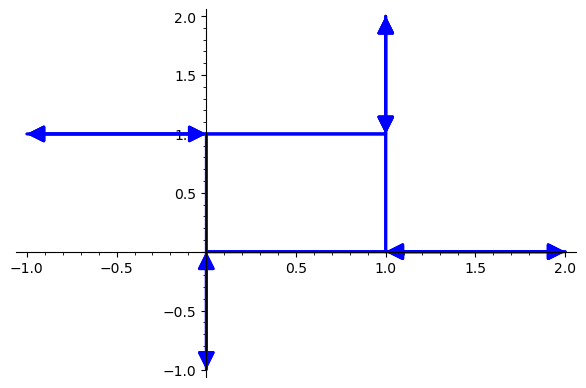

In [171]:
a=0*i
b=next(s)
gra=arrow(a,b)
for _ in range(0,20):
    a,b=b,next(s)
    gra += arrow(a,b)

gra

In [174]:
s=Spacer()
[next(s) for _ in range(0,10)]

[2, 1, 2*I + 1, I + 1, I - 1, I, -I, 0, 2, 1]

# Zadanie 4

Liczba $m$ jest równa odwrotności powiększonej o $1$ liczby $m$. Wyznacz $m^{10}$.

In [179]:
m=var('m')
[(m^10).subs({m:x.rhs()}).expand() for x in solve(m-1/(1+m),m)]

[55/2*sqrt(5) + 123/2, -55/2*sqrt(5) + 123/2]

In [14]:
#rozwiązanie z pierścieniem ilorazowym

R2.<T>=PolynomialRing(Rationals())
polrel=(T-(1/(1+T))).numerator()
Q2.<m>=R2.quotient_ring(R2.ideal(polrel))

m^10

-55*m + 34

# Zadanie 5

Niech $G=\{(a,b)\in \mathbb{C}^2: a^2+b^2\neq 0\}$. Na zbiorze $G$ wprowadzamy operację:

$$m:G\times G\rightarrow G$$

$$m((a,b),(u,v))=(au-bv,av+bu)$$

Uzasadnij, że $(G,m)$ jest grupą abelową. Wyznacz wszystkie elementy rzędu $4$ i $6$ w tej grupie.

In [2]:
class gr:
    def __init__(self,a,b):
        self.x=a
        self.y=b
        
    def __mul__(self,ob):
        a=self.x
        b=self.y
        u=ob.x
        v=ob.y
        x1=a*u-b*v
        y1=b*u+a*v
        return gr(x1,y1)
    
    def __inv__(self):
        a=self.x
        b=self.y
        return gr(a/(a^2+b^2),-b/(a^2+b^2))
    
    def __eq__(self,ob):
        if (self.x==ob.x) and (self.y==ob.y):
            return True
        else:
            return False
    
    def __repr__(self):
        return "("+str(self.x)+","+str(self.y)+")"
    
    def coords(self):
        return [self.x,self.y]

In [24]:
#działanie jest zamknięte (uzasadnij, że jesli (a,b), (u,v) należą do G, to (au-bv,av+bu) nalezy do G, tzn. )

a,b,u,v=var('a,b,u,v')

print(gr(a,b)*gr(u,v))

eqs=[a*u==b*v,b*u==-a*v]

solv=solve(eqs,(a,b,u,v))

#wszystkie rozwiazania spełniają albo a^2+b^2=0, albo u^2+v^2=0
[[(a^2+b^2).subs(s),(u^2+v^2).subs(s)] for s in solv]

(a*u - b*v,b*u + a*v)


[[r41^2 + r42^2, 0], [0, 0], [0, 0], [0, r47^2 + r48^2]]

In [25]:
#łączność

a,b=var('a,b')
c,d=var('c,d')
e,f=var('e,f')

ll=(gr(a,b)*gr(c,d))*gr(e,f)
rr=gr(a,b)*(gr(c,d)*gr(e,f))

assert (ll.x-rr.x).expand() == 0
assert (ll.y-rr.y).expand() == 0

In [3]:
#el. neutralny

a,b=var('a,b')

el1=(gr(1,0)*gr(a,b))
el2=(gr(a,b)*gr(1,0))

assert bool(el1==el2) #these tuples are not identical as Python objects unless we define properly the __eq__ method
assert bool(el1==gr(a,b))

In [49]:
#odwrotnosc
a,b=var('a,b')
assert (gr(a,b)*gr(a/(a^2+b^2),-b/(a^2+b^2))).x.simplify_full()==1
assert (gr(a,b)*gr(a/(a^2+b^2),-b/(a^2+b^2))).y.simplify_full()==0

#inna metoda
assert bool(gr(a,b)*gr(a/(a^2+b^2),-b/(a^2+b^2))==gr(1,0))
assert bool(gr(a/(a^2+b^2),-b/(a^2+b^2))*gr(a,b)==gr(1,0))

In [74]:
#elementy rzedu 4
a,b=var('a,b')
g=gr(a,b)
ginv=gr(a,b).__inv__() #element odwrotny; nie mamy jeszcze implementacji potęgowania więc napisanie gr(a,b)^(-1) lub gr(a,b)**(-1) nie zadziała

v=vector((g*g).coords())-vector((g*g).__inv__().coords()) #odjęcie list jako wektorów (wygodny trik)

eqs=[v[0].factor().numerator(),v[1].factor().numerator()] #równania definiujące elementy rzędu 1,2 lub 4
solv=solve(eqs,(a,b))
els=[gr(a.subs(s),b.subs(s)) for s in solv] #elementy rzędów 1, 2 lub 4; które mają rząd 4?

def Order(g,bound):
    n=0
    e=gr(SR(1),SR(0))
    el=e #pierścień symboliczny SR (uwaga, w przypadku grup na innych pierścieniach trzeba to zmodyfikować)
    while n<bound:
        n+=1
        el*=g
        if el == e:
            return n
    print("Rząd elementu nie został określony")
    print(g)
    return 0
    

In [75]:
[g for g in els if Order(g,100) == 4]

Rząd elementu nie został określony
(0,0)


[(-I,0),
 (I,0),
 (0,-1),
 (0,1),
 (-1/2*I - 1/2,-1/2*I - 1/2),
 (1/2*I - 1/2,1/2*I - 1/2),
 (-1/2*I + 1/2,-1/2*I + 1/2),
 (1/2*I + 1/2,1/2*I + 1/2),
 (-1/2*I - 1/2,1/2*I + 1/2),
 (1/2*I - 1/2,-1/2*I + 1/2),
 (-1/2*I + 1/2,1/2*I - 1/2),
 (1/2*I + 1/2,-1/2*I - 1/2)]

In [78]:
v2=vector((g*g*g).coords())-vector((g*g*g).__inv__().coords()) #odjęcie list jako wektorów (wygodny trik)

eqs2=[v2[0].factor().numerator(),v2[1].factor().numerator()] #równania definiujące elementy rzędu 1,2 lub 4
solv2=solve(eqs2,(a,b))
els2=[gr(a.subs(s),b.subs(s)) for s in solv2] #elementy rzędów 1, 2, 3 lub 6; które mają rząd 6?
[g for g in els2 if Order(g,100) == 6]

Rząd elementu nie został określony
(0,0)


[(-1/2*I*sqrt(3) + 1/2,0),
 (1/2*I*sqrt(3) + 1/2,0),
 (0,-1/2*sqrt(3) - 1/2*I),
 (0,1/2*sqrt(3) + 1/2*I),
 (0,-1/2*sqrt(3) + 1/2*I),
 (0,1/2*sqrt(3) - 1/2*I),
 (-1/4*I*sqrt(3) - 3/4,-1/4*sqrt(3) - 1/4*I),
 (-1/4*I*sqrt(3) - 3/4,1/4*sqrt(3) + 1/4*I),
 (1/4*I*sqrt(3) - 3/4,-1/4*sqrt(3) + 1/4*I),
 (1/4*I*sqrt(3) - 3/4,1/4*sqrt(3) - 1/4*I),
 (-1/4*I*sqrt(3) + 3/4,-1/4*sqrt(3) + 1/4*I),
 (-1/4*I*sqrt(3) + 3/4,1/4*sqrt(3) - 1/4*I),
 (1/4*I*sqrt(3) + 3/4,-1/4*sqrt(3) - 1/4*I),
 (1/4*I*sqrt(3) + 3/4,1/4*sqrt(3) + 1/4*I),
 (1/2,-1/2*sqrt(3)),
 (1/2,1/2*sqrt(3)),
 (-1/4*I*sqrt(3) - 1/4,-1/4*sqrt(3) - 3/4*I),
 (-1/4*I*sqrt(3) - 1/4,1/4*sqrt(3) + 3/4*I),
 (1/4*I*sqrt(3) - 1/4,-1/4*sqrt(3) + 3/4*I),
 (1/4*I*sqrt(3) - 1/4,1/4*sqrt(3) - 3/4*I),
 (-1/2*I*sqrt(3),-1/2*I),
 (-1/2*I*sqrt(3),1/2*I),
 (1/2*I*sqrt(3),-1/2*I),
 (1/2*I*sqrt(3),1/2*I)]